# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key

'088c1850775c695fffbde60a563bc429'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# * Temperature (F) vs. Latitude * Humidity (%) vs. Latitude * Cloudiness (%) vs. Latitude * Wind Speed (mph) vs. Latitude

temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
found_cities = []
no_data = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if (response['cod'] == "404" ):
        no_data.append(city)
    elif (response['cod'] == "401" ):
        break
    else:
        found_cities.append(city)
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(city)

puerto ayora
gannan
saskylakh
ushuaia
cidreira
mildura
ati
narsaq
bintulu
ilhabela
lienz
thompson
hobart
vilhena
georgetown
barrow
vestmannaeyjar
punta arenas
mbandaka
atuona
pisco
ahipara
ormara
wasilla
mar del plata
tuatapere
asau
bengkulu
busselton
norman wells
masallatah
malumfashi
paamiut
aranos
arraial do cabo
dikson
ulaanbaatar
paola
mosquera
calama
cape town
sarakhs
hofn
rikitea
upernavik
abu kamal
ossora
bredasdorp
stromness
ketchikan
khuzhir
beisfjord
vaini
yeppoon
nikolskoye
kapaa
clyde river
poronaysk
saint george
jaisalmer
avarua
kalmunai
bethel
pangai
hami
katsuura
tuktoyaktuk
ewa beach
albany
batemans bay
soubre
mataura
vernon
veraval
olafsvik
tupik
tual
emerald
zunyi
husavik
ostrow wielkopolski
kodiak
khasan
kidal
hilo
butaritari
bluff
new norfolk
vanimo
ponta do sol
ipixuna
straumen
severo-kurilsk
phenix city
cabo san lucas
oranjemund
szany
belmonte
manaus
nador
airai
kayes
mao
tiksi
ulladulla
alofi
novyy svit
ust-koksa
debre birhan
cayenne
aklavik
leshukonskoye
hovd
v

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#create dataframe of cities data
weather_dict = {
    "City": found_cities,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": lon,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed (mph)": wind_speed
}
#write to a dataframe
weather_df = pd.DataFrame(weather_dict)

In [21]:
#creating output file for part II -- and to be used in 2nd half of this activity (to avoid re-hitting API)
weather_df.to_csv(output_data_file)

weather_df

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed (mph)
0,puerto ayora,25.56,-0.7393,-90.3518,91,53,2.50
1,gannan,-5.45,47.9147,123.5031,90,15,2.80
2,saskylakh,-31.79,71.9167,114.0833,82,0,3.98
3,ushuaia,17.00,-54.8000,-68.3000,72,0,2.06
4,cidreira,23.68,-30.1811,-50.2056,80,94,7.99
...,...,...,...,...,...,...,...
562,bardiyah,15.64,31.7561,25.0865,43,0,4.07
563,chimoio,20.76,-19.1164,33.4833,94,40,2.57
564,eureka,8.50,40.8021,-124.1637,91,95,0.99
565,marrakesh,13.00,31.6315,-8.0083,94,75,2.06


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
#bringing back in output file to avoid re-running API when restarting kernel
weather_df = pd.read_csv(output_data_file,index_col=[0])

slim_weather_df = weather_df.loc[weather_df['Humidity'] < 100]

slim_weather_df

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed (mph)
0,puerto ayora,25.56,-0.7393,-90.3518,91,53,2.50
1,gannan,-5.45,47.9147,123.5031,90,15,2.80
2,saskylakh,-31.79,71.9167,114.0833,82,0,3.98
3,ushuaia,17.00,-54.8000,-68.3000,72,0,2.06
4,cidreira,23.68,-30.1811,-50.2056,80,94,7.99
...,...,...,...,...,...,...,...
562,bardiyah,15.64,31.7561,25.0865,43,0,4.07
563,chimoio,20.76,-19.1164,33.4833,94,40,2.57
564,eureka,8.50,40.8021,-124.1637,91,95,0.99
565,marrakesh,13.00,31.6315,-8.0083,94,75,2.06


In [4]:
#  Get the indices of cities that have humidity over 100%.
drop_rows = weather_df.index[weather_df['Humidity'] >= 100].tolist()

drop_rows

[26,
 93,
 96,
 119,
 153,
 180,
 197,
 209,
 222,
 233,
 253,
 339,
 353,
 369,
 455,
 458,
 460,
 492,
 511]

In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(drop_rows)

clean_city_data

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed (mph)
0,puerto ayora,25.56,-0.7393,-90.3518,91,53,2.50
1,gannan,-5.45,47.9147,123.5031,90,15,2.80
2,saskylakh,-31.79,71.9167,114.0833,82,0,3.98
3,ushuaia,17.00,-54.8000,-68.3000,72,0,2.06
4,cidreira,23.68,-30.1811,-50.2056,80,94,7.99
...,...,...,...,...,...,...,...
562,bardiyah,15.64,31.7561,25.0865,43,0,4.07
563,chimoio,20.76,-19.1164,33.4833,94,40,2.57
564,eureka,8.50,40.8021,-124.1637,91,95,0.99
565,marrakesh,13.00,31.6315,-8.0083,94,75,2.06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
#create variables for plotting
clean_lat = clean_city_data['Latitude']
clean_temp = clean_city_data['Temperature']


## Latitude vs. Temperature Plot

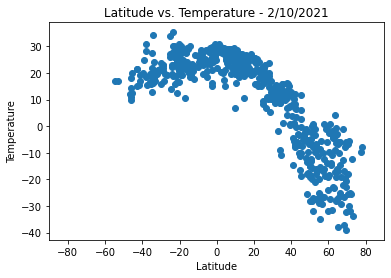

In [7]:
#creating plot
plt.scatter(clean_lat,clean_temp)
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature - 2/10/2021')
plt.savefig("../output_data/Latitude vs. Temperature.png")
plt.show()

In [ ]:
#Observations
# Temperature is highest near the equator, as expected.
# More of the world's population - and thereby cities - are in the Northern Hemisphere,
# which causes a greater number of data points >0 than <0.

## Latitude vs. Humidity Plot

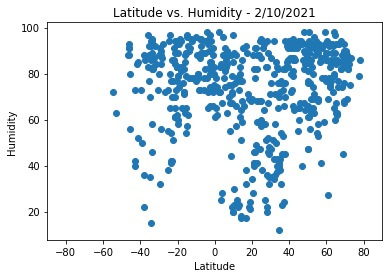

In [8]:
clean_humid = clean_city_data['Humidity']

plt.scatter(clean_lat,clean_humid)
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity - 2/10/2021')
plt.savefig("../output_data/Latitude vs. Humidity.png")
plt.show()

In [ ]:
# Observations
# Overall, humidity is largely unpredictable. There are locations near the equator that span the range of humidity.
# For other latitudes, a similar range exists.

## Latitude vs. Cloudiness Plot

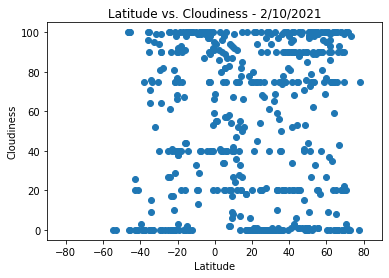

In [9]:
clean_cloudiness = clean_city_data['Cloudiness']

plt.scatter(clean_lat,clean_cloudiness)
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness - 2/10/2021')
plt.savefig("../output_data/Latitude vs. Cloudiness.png")
plt.show()

In [ ]:
# Observations
# There is a somewhat high concentration of cities with either 100% cloudiness or 0%
# There is a notable gap in cloudiness near the equator -- there are no locations with 0% clouds

## Latitude vs. Wind Speed Plot

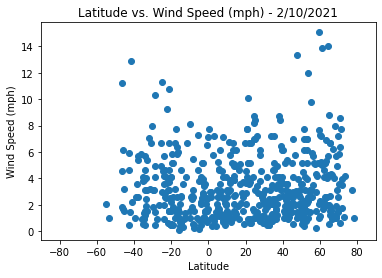

In [10]:
clean_wind_speed = clean_city_data['Wind Speed (mph)']

plt.scatter(clean_lat,clean_wind_speed)
plt.xlabel('Latitude')
plt.xlim(-90,90)
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) - 2/10/2021')
plt.savefig("../output_data/Latitude vs. Wind Speed (mph).png")
plt.show()

In [ ]:
# Observations
# The highest windspeeds were recorded near the poles, where we might expect the most severe weather

## Linear Regression

In [11]:
north_df = clean_city_data.loc[weather_df['Latitude'] > 0]
south_df = clean_city_data.loc[weather_df['Latitude'] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

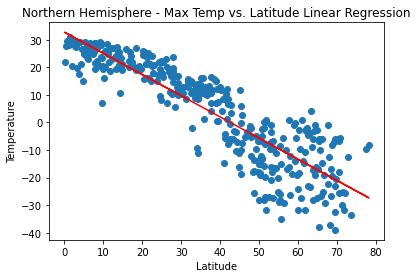

In [12]:
x_values = north_df['Latitude']
y_values = north_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the northern hemisphere, temperature falls as latitude rises

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

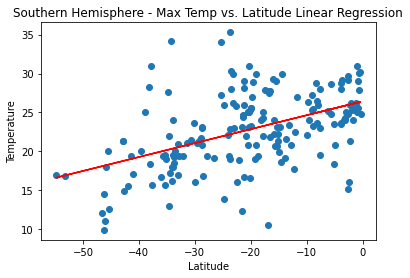

In [13]:
x_values = south_df['Latitude']
y_values = south_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the southern hemisphere, temperature rises as latitude rises

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

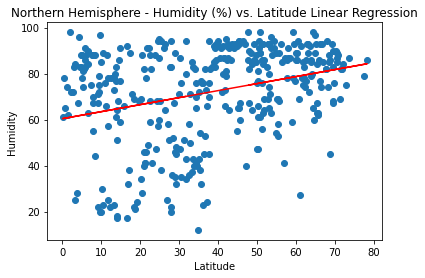

In [14]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the northern hemisphere, humidity slightly rises as latitude rises

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

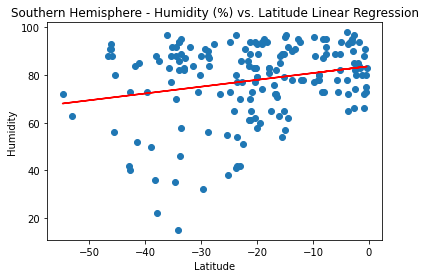

In [15]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the southern hemisphere, humidity slightly rises as latitude rises

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

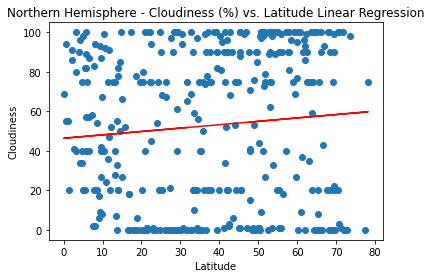

In [16]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the northern hemisphere, cloudiness slightly rises as latitude rises, but the relationship is faint

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

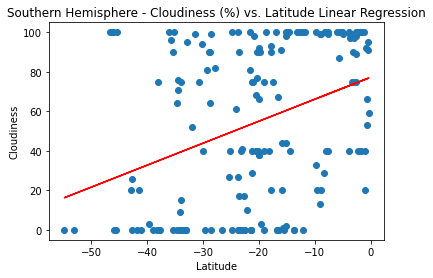

In [17]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the southern hemisphere, cloudiness rises as latitude rises

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

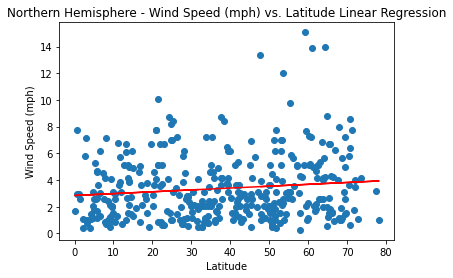

In [18]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the northern hemisphere, wind speed slightly rises as latitude rises, 
# and there could be a need for more data points at higher latitudes

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

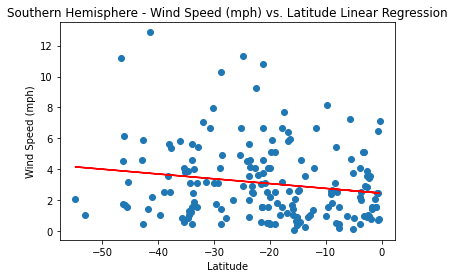

In [19]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) (%) vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# Observations
# In the southern hemisphere, wind speed slightly falls as latitude rises, 
# and there could be a need for more data points at lower latitudes